[2.06064340e-06 4.57630952e-05 2.26971335e-04 ... 1.00000000e+00
 1.00000000e+00 1.00000000e+00]
1.0


/var/folders/sy/vxhnb6x11wz6mkt7x_sw_y140000gn/T/ipykernel_24756/24937741.py:14: RuntimeWarning: overflow encountered in power
  exp_x = np.power(np.e, x)  # Generate x-values from 0.01 to 10


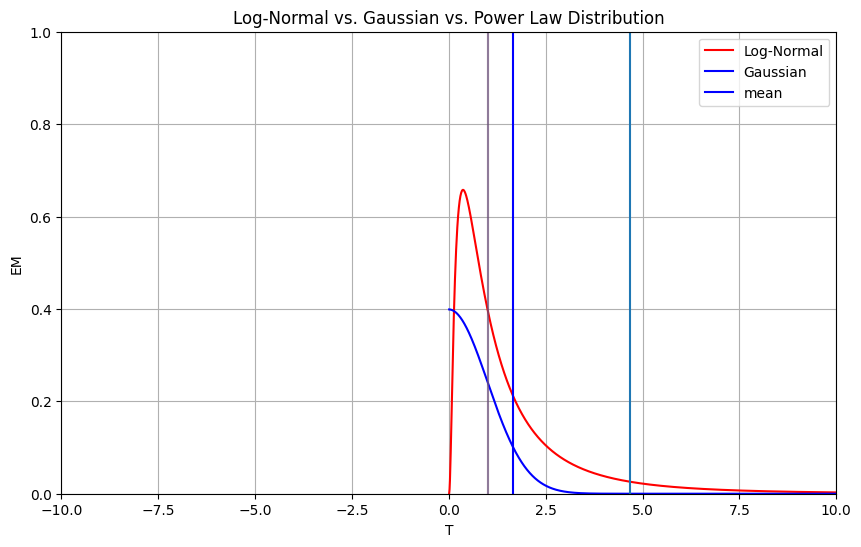

In [166]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm, norm, powerlaw

# Parameters for the distributions
log_mu = 2
mu = 0    # Mean for both log-normal and Gaussian distributions
sigma = 1   # Standard deviation for both log-normal and Gaussian distributions
s = 1       # Shape parameter for the log-normal distribution (controls skewness)
alpha = 0.5 # Shape parameter for the power-law distribution

# Generate data for all three distributions
x = np.linspace(0.01, 1000, 100000)
exp_x = np.power(np.e, x)  # Generate x-values from 0.01 to 10

# Calculate the PDFs for the log-normal, Gaussian, and power-law distributions
gaussian_pdf = norm.pdf(x, mu, sigma)
powerlaw_pdf = powerlaw.pdf(x, alpha, scale=10)
lognormal_pdf = lognorm.pdf(x, sigma, 0, np.exp(mu))
lognormal_pdf2 = lognorm.pdf(x, sigma, 2, 1)
lognormal_cdf = lognorm.cdf(x, sigma, 0, np.exp(mu))
# Create a comparison plot
plt.figure(figsize=(10, 6))
plt.plot(x, lognormal_pdf, label='Log-Normal', color='red')
# plt.plot(x, lognormal_cdf, label='Log-Normal-cdf', color='red')
# plt.plot(x, lognormal_pdf2, label='Log-Normal2', color='red')
plt.plot(x, gaussian_pdf, label='Gaussian', color='blue')
# plt.plot(x, powerlaw_pdf, label='Power Law', color='green')
print(lognormal_cdf)
med_idx = np.argmin(abs(lognormal_cdf-0.5))
plt.axvline(x[med_idx], c= 'r', alpha = 0.5)
print(x[med_idx])
plt.axvline(np.exp(mu), alpha = 0.5)
plt.axvline(np.exp(mu+sigma**2/2), c = 'b', label = 'mean')
var = (np.exp(sigma**2)-1) * np.exp(2*mu+sigma**2)
# plt.axvline(np.exp(mu+sigma**2/2)-var)
# plt.axvline(np.exp(mu+sigma**2/2)+var)
plt.axvline(var)
# Add labels and a legend
plt.xlabel('T')
plt.ylabel('EM')
plt.title('Log-Normal vs. Gaussian vs. Power Law Distribution')
plt.legend()
plt.ylim(0,1)
plt.xlim(-10,10)
# Display the plot
plt.grid(True)
plt.show()



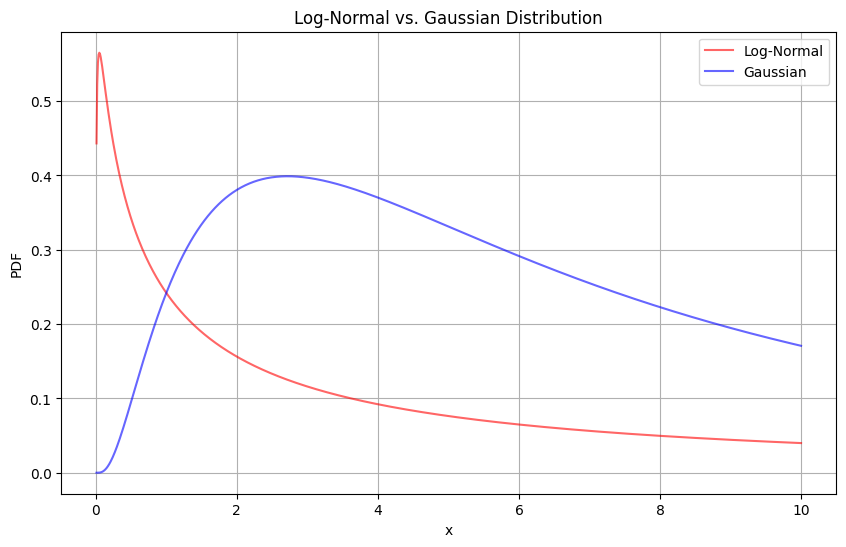

In [122]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

def ln_pdf(x, x0, sigma, y0):
    return y0/(sigma*np.sqrt(2*np.pi))/x * np.exp((-(np.log10(x)-x0)**2)/(2*sigma**2))

def gaussian_pdf(x, x0, sigma, y0):
    return y0/(sigma*np.sqrt(2*np.pi)) * np.exp((-(x-x0)**2)/(2*sigma**2))

# Parameters for the log-normal distribution
x0 = 1  # Location parameter on the logarithmic scale
sigma = 1  # Standard deviation on the logarithmic scale
y0 = 1  # Scaling factor

# Convert to parameters for the Gaussian distribution
mu = np.log(x0)
sigma_gaussian = 1

# Generate x-values
x_values = np.linspace(0.01, 10, 1000)

# Calculate the PDFs for both distributions
# lognormal_pdf = ln_pdf(x_values, x0, sigma, sigma, y0)
gaussian_pdf = gaussian_pdf(np.log(x_values), x0, sigma_gaussian, y0)
lognormal_pdf = ln_pdf(x_values, x0, sigma_gaussian, y0)

# Create a comparison plot
plt.figure(figsize=(10, 6))
plt.plot(x_values, lognormal_pdf, label='Log-Normal', alpha = 0.6, color='red')
plt.plot(x_values, gaussian_pdf, label='Gaussian',alpha = 0.6, color='blue')
plt.xlabel('x')
plt.ylabel('PDF')
plt.title('Log-Normal vs. Gaussian Distribution')
plt.legend()
plt.grid(True)
plt.show()


In [45]:
np.power(10,0.5)

3.1622776601683795

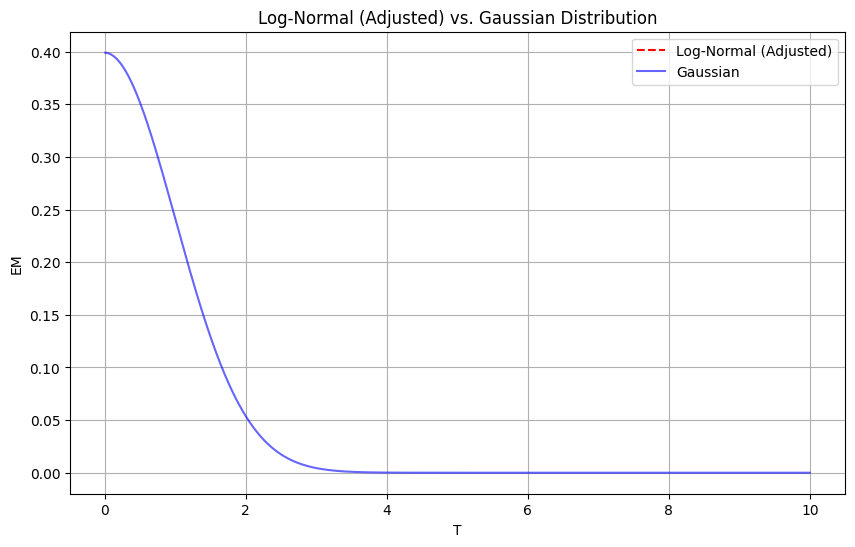

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm, norm

# Parameters for the Gaussian distribution
mu = 0      # Mean for both distributions
sigma = 1   # Standard deviation for both distributions

# Calculate the log-normal parameters to match the Gaussian distribution
# Given that mean_ln = ln(mu) and std_ln = sigma, we need to solve for mu_ln and sigma_ln.
mu_ln = mu - 0.5 * sigma**2
sigma_ln = sigma

# Generate data for both distributions
x = np.linspace(0.01, 10, 1000)  # Generate x-values from 0.01 to 10

# Calculate the PDFs for the modified log-normal and Gaussian distributions
lognormal_pdf = lognorm.pdf(x, sigma_ln, scale=mu_ln)
gaussian_pdf = norm.pdf(x, mu, sigma)

# Create a comparison plot
plt.figure(figsize=(10, 6))
plt.plot(x, lognormal_pdf, 'r--', label='Log-Normal (Adjusted)')
plt.plot(x, gaussian_pdf, label='Gaussian',alpha = 0.6, color='blue')

# Add labels and a legend
plt.xlabel('T')
plt.ylabel('EM')
plt.title('Log-Normal (Adjusted) vs. Gaussian Distribution')
plt.legend()

# Display the plot
plt.grid(True)
plt.show()
